In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [25]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_encoded_K562_INS.csv",
                              index_col=0)

In [26]:
identity_metrics.mean(1)

r_squared           0.985337
sinkhorn_div_1      6.011643
sinkhorn_div_10     2.520677
sinkhorn_div_100    1.821086
e_distance          3.519057
mmd                 0.017875
dtype: float64

CellFlow

In [27]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_encoded_K562_INS.csv",
                              index_col=0)

In [28]:
cellflow_metrics.mean(1)

r_squared           0.984218
sinkhorn_div_1      6.172444
sinkhorn_div_10     2.882077
sinkhorn_div_100    2.011182
e_distance          3.797438
mmd                 0.021614
dtype: float64

Metrics

In [31]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_encoded_K562_INS.csv",
                              index_col=0)

In [32]:
mean_metrics.mean(1)

r_squared            -0.459092
sinkhorn_div_1      176.819039
sinkhorn_div_10     173.327767
sinkhorn_div_100    172.628242
e_distance          345.136531
mmd                   0.426223
dtype: float64

## Get gene list by distance from the controls 

In [33]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_K562_INS.csv",
                              index_col=0)

In [34]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [35]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [36]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [37]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*mean_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [38]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [39]:
pathways = []
cell_lines = []

for cat in merged.index:
    cell_line, pathway, _ = cat.split("_")
    pathways.append(pathway)
    cell_lines.append(cell_line)

In [40]:
# merged["pathway"] = pathways
# merged["cell_line"] = cell_lines
# merged = merged.loc[merged.pathway=="IFNG"]

In [41]:
merged

r_squared  sinkhorn_div_1  sinkhorn_div_10  sinkhorn_div_100  \
K562_INS_CHUK     0.998029        4.304231         0.769129          0.258160   
K562_INS_COPS4    0.989783        6.430631         2.222176          1.262421   
K562_INS_DR1      0.968113       10.029276         5.952606          4.041824   
K562_INS_EIF2B1   0.999576        3.207817         0.316391          0.067066   
K562_INS_FOS      0.978047        7.153145         3.441099          2.615566   
...                    ...             ...              ...               ...   
K562_INS_TSC2     0.993019        4.636966         1.712090          0.899660   
K562_INS_TTF1     0.990425        6.372759         2.706209          1.264502   
K562_INS_TTF2     0.994982        5.338143         1.409813          0.630047   
K562_INS_XBP1     0.997924        5.013450         1.396572          0.368080   
K562_INS_ZNF593   0.998918        3.211408         0.550995          0.162098   

                 e_distance       mmd     Model  Perturbation effect  
K562_INS_CHUK      0.442617  0.005030  Identity                    3  
K562_INS_COPS4     2.271330  0.014604  Identity                    1  
K562_INS_DR1       7.152861  0.036774  Identity                    1  
K562_INS_EIF2B1    0.099239  0.002056  Identity                    4  
K562_INS_FOS       5.131630  0.027042  Identity                    0  
...                     ...       ...       ...                  ...  
K562_INS_TSC2      1.562888  0.010764  cellFlow                    3  
K562_INS_TTF1      1.990893  0.011138  cellFlow                    0  
K562_INS_TTF2      1.103504  0.010278  cellFlow                    0  
K562_INS_XBP1      0.485408  0.006978  cellFlow                    0  
K562_INS_ZNF593    0.252846  0.003705  cellFlow                    4  

[120 rows x 8 columns]

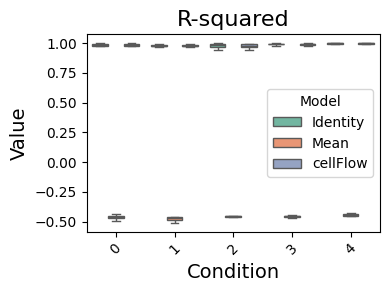

In [42]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

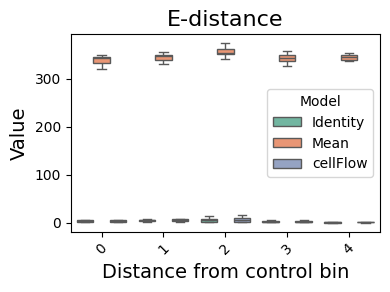

In [43]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

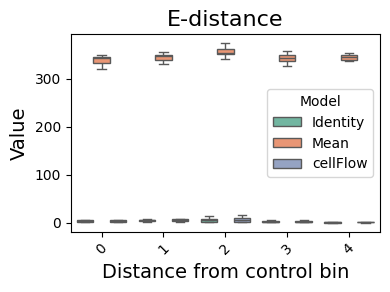

In [44]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [22]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s